In [30]:
import pandas as pd          
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
import matplotlib
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")
from math import sqrt
from sklearn.metrics import mean_squared_error
from numpy import array
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats

In [31]:
df = pd.read_csv('/content/PRSA_Data_Gucheng.csv')

df = df.drop(['No','station'],axis = 1)

#Changing the column names
cnames = list(df.columns)

#Drop the first row 
#df = df[24:]

df.dtypes

df.reset_index(inplace = True)
df = df.drop(['index'], axis = 1)

df_new = df[['year', 'month', 'day', 'hour']]
df_new['date'] = pd.to_datetime(df_new)

df['date'] = df_new['date']

#Set the date as Index
df = df.set_index(df['date'],drop = False)
df = df.sort_index()

# df_cbwd = df['cbwd']
# df_cbwd['cbwd_mode'] = df_cbwd.resample("d").apply(lambda x: stats.mode(x)[0])

# df = df.resample('d').mean()
# df['cbwd'] = df_cbwd['cbwd_mode']

df['day_of_week'] = df.index.dayofweek

def weekend(row):
    if (row == 5) or (row == 6):
        return 1
    else:
        return 0

df['weekend'] = df['day_of_week'].apply(weekend)


mean = df['PM10'].min()
std_dev = df['PM10'].max() - df['PM10'].min()

for field in cnames:
    print(field, df[field].isna().sum())

df['PM10'] = df['PM10'].fillna(df['PM10'].mean())

df = pd.get_dummies(df, columns = ['wd'] )    

#df['PM10'] = df['PM10']
#df = df.drop(['PM10'], axis = 1)

df = df.drop(['hour', 'date'], axis = 1)

cnames = list(df.columns)

year 0
month 0
day 0
hour 0
PM2.5 646
PM10 381
SO2 507
NO2 668
CO 1401
O3 729
TEMP 51
PRES 50
DEWP 51
RAIN 43
wd 159
WSPM 42


In [32]:
print(cnames)

['year', 'month', 'day', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'day_of_week', 'weekend', 'wd_E', 'wd_ENE', 'wd_ESE', 'wd_N', 'wd_NE', 'wd_NNE', 'wd_NNW', 'wd_NW', 'wd_S', 'wd_SE', 'wd_SSE', 'wd_SSW', 'wd_SW', 'wd_W', 'wd_WNW', 'wd_WSW']


In [33]:
for field in cnames:
  df[field] = df[field].fillna(df[field].mean())

In [34]:
for field in cnames:
    print(field, df[field].isna().sum())

year 0
month 0
day 0
PM2.5 0
PM10 0
SO2 0
NO2 0
CO 0
O3 0
TEMP 0
PRES 0
DEWP 0
RAIN 0
WSPM 0
day_of_week 0
weekend 0
wd_E 0
wd_ENE 0
wd_ESE 0
wd_N 0
wd_NE 0
wd_NNE 0
wd_NNW 0
wd_NW 0
wd_S 0
wd_SE 0
wd_SSE 0
wd_SSW 0
wd_SW 0
wd_W 0
wd_WNW 0
wd_WSW 0


In [35]:
df.head()

,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,day_of_week,weekend,wd_E,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,2013,3,1,6.0,18.0,5.000000,55.871075,800.000000,88.000000,0.1,1021.1,-18.6,0.0,4.4,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2013-03-01 01:00:00,2013,3,1,6.0,15.0,5.000000,55.871075,800.000000,88.000000,-0.3,1021.5,-19.0,0.0,4.0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2013-03-01 02:00:00,2013,3,1,5.0,18.0,15.366162,55.871075,700.000000,52.000000,-0.7,1021.5,-19.8,0.0,4.6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2013-03-01 03:00:00,2013,3,1,6.0,20.0,6.000000,55.871075,1323.974423,57.694879,-1.0,1022.7,-21.2,0.0,2.8,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2013-03-01 04:00:00,2013,3,1,5.0,17.0,5.000000,55.871075,600.000000,73.000000,-1.3,1023.0,-21.4,0.0,3.6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [36]:
df['pm10'] = df['PM10']
df = df.drop('PM10', axis = 1)
df['PM10'] = df['pm10']
df = df.drop('pm10', axis = 1)
df.head()

,year,month,day,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,day_of_week,weekend,wd_E,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW,PM10
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,2013,3,1,6.0,5.000000,55.871075,800.000000,88.000000,0.1,1021.1,-18.6,0.0,4.4,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,18.0
2013-03-01 01:00:00,2013,3,1,6.0,5.000000,55.871075,800.000000,88.000000,-0.3,1021.5,-19.0,0.0,4.0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,15.0
2013-03-01 02:00:00,2013,3,1,5.0,15.366162,55.871075,700.000000,52.000000,-0.7,1021.5,-19.8,0.0,4.6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,18.0
2013-03-01 03:00:00,2013,3,1,6.0,6.000000,55.871075,1323.974423,57.694879,-1.0,1022.7,-21.2,0.0,2.8,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,20.0
2013-03-01 04:00:00,2013,3,1,5.0,5.000000,55.871075,600.000000,73.000000,-1.3,1023.0,-21.4,0.0,3.6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,17.0


In [37]:
df = df.resample('d').mean()

In [38]:
df.head()

,year,month,day,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,day_of_week,weekend,wd_E,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW,PM10
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-01,2013,3,1,8.625000,7.723590,48.934229,888.498934,76.320620,1.691667,1024.816667,-19.691667,0.0,2.350000,4,0,0.166667,0.333333,0.083333,0.000000,0.125000,0.000000,0.000000,0.083333,0.000000,0.000000,0.041667,0.000000,0.000000,0.041667,0.125000,0.000000,16.875000
2013-03-02,2013,3,2,36.916667,37.291667,38.327961,1479.041667,39.583333,0.820833,1024.900000,-16.337500,0.0,1.087500,5,1,0.125000,0.208333,0.041667,0.000000,0.041667,0.041667,0.041667,0.041667,0.083333,0.041667,0.166667,0.083333,0.083333,0.000000,0.000000,0.000000,51.375000
2013-03-03,2013,3,3,80.333333,47.541667,62.400551,2349.708333,33.708333,6.562500,1012.566667,-11.991667,0.0,1.400000,6,1,0.041667,0.000000,0.041667,0.041667,0.041667,0.000000,0.041667,0.083333,0.000000,0.083333,0.083333,0.041667,0.083333,0.041667,0.375000,0.000000,120.041667
2013-03-04,2013,3,4,26.500000,18.666667,44.268871,1170.666667,67.250000,9.795833,1015.608333,-11.945833,0.0,1.541667,0,0,0.083333,0.000000,0.083333,0.083333,0.041667,0.041667,0.000000,0.000000,0.041667,0.041667,0.083333,0.083333,0.041667,0.166667,0.166667,0.041667,51.291667
2013-03-05,2013,3,5,136.708333,72.640257,63.216460,1376.747869,84.375000,6.750000,1008.883333,-7.741667,0.0,0.841667,1,0,0.083333,0.041667,0.041667,0.041667,0.125000,0.000000,0.083333,0.041667,0.000000,0.250000,0.000000,0.000000,0.000000,0.125000,0.166667,0.000000,172.541667


In [39]:
df = df.iloc[:-4,:]

In [40]:
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

for field in cnames:
    df[field] = (df[field] - df[field].min())/(df[field].max() - df[field].min())

# choose a number of time steps
n_steps_in, n_steps_out = 15, 4

X, y = split_sequences(df.values, n_steps_in, n_steps_out)

X_test, y_test = X[-1], y[-1]

for i in range(n_steps_out):
	X = np.delete(X, X.shape[0] - 1, 0)
	y = np.delete(y, y.shape[0] - 1, 0)

n_features = X.shape[2]


In [41]:
df.head()

,year,month,day,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,day_of_week,weekend,wd_E,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW,PM10
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-01,0.0,0.181818,0.000000,0.006399,0.052133,0.241420,0.084255,0.412797,0.345057,0.769810,0.207441,0.0,0.310202,0.666667,0.0,0.500,0.888889,0.250,0.000000,0.166667,0.000000,0.000000,0.083333,0.000000,0.000000,0.125,0.000000,0.000000,0.066667,0.214286,0.000,0.018881
2013-03-02,0.0,0.181818,0.033333,0.061396,0.303177,0.183686,0.151721,0.208748,0.326257,0.771501,0.265706,0.0,0.130486,0.833333,1.0,0.375,0.555556,0.125,0.000000,0.055556,0.052632,0.071429,0.041667,0.117647,0.076923,0.500,0.117647,0.181818,0.000000,0.000000,0.000,0.080672
2013-03-03,0.0,0.181818,0.066667,0.145796,0.390203,0.314723,0.251190,0.176117,0.450211,0.521184,0.341199,0.0,0.174970,1.000000,1.0,0.125,0.000000,0.125,0.055556,0.055556,0.000000,0.071429,0.083333,0.000000,0.153846,0.250,0.058824,0.181818,0.066667,0.642857,0.000,0.203657
2013-03-04,0.0,0.181818,0.100000,0.041147,0.145044,0.216025,0.116491,0.362416,0.520014,0.582918,0.341995,0.0,0.195136,0.000000,0.0,0.250,0.000000,0.250,0.111111,0.055556,0.052632,0.000000,0.000000,0.058824,0.076923,0.250,0.117647,0.090909,0.266667,0.285714,0.125,0.080522
2013-03-05,0.0,0.181818,0.133333,0.255386,0.603299,0.319164,0.140035,0.457533,0.454259,0.446427,0.415026,0.0,0.095492,0.166667,0.0,0.250,0.111111,0.125,0.055556,0.166667,0.000000,0.142857,0.041667,0.000000,0.461538,0.000,0.000000,0.000000,0.200000,0.285714,0.000,0.297687


In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import LSTM
# from keras.layers import GRU
from keras.layers.normalization import BatchNormalization
from keras.layers import Bidirectional
from keras.layers import Dropout

In [43]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(n_steps_in, n_features)))
model.add(MaxPooling1D(pool_size=2))

# model.add(BatchNormalization())

model.add(Conv1D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
# model.add(Flatten())
# model.add(Dense(50, activation='relu'))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(50))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='RMSProp', loss='mae')


In [44]:
from tensorflow.keras.callbacks import EarlyStopping

monitor = EarlyStopping(monitor='loss', min_delta=1e-3, patience=50, verbose=1, mode='auto',
        restore_best_weights=True)
model.fit(X, y, callbacks=[monitor], verbose=1, epochs=2000)

#from sklearn.externals import joblib 
#path = "/content/drive/My Drive/"
#name_file = "model82AEMaxScaled.pkl"  
# Save the model as a pickle in a file 
#joblib.dump(model, path+name_file)

Epoch 1/2000
1436/1436 [==============================] - 1s 830us/step - loss: 0.1089
Epoch 2/2000
1436/1436 [==============================] - 0s 253us/step - loss: 0.1008
Epoch 3/2000
1436/1436 [==============================] - 0s 257us/step - loss: 0.0996
Epoch 4/2000
1436/1436 [==============================] - 0s 275us/step - loss: 0.0968
Epoch 5/2000
1436/1436 [==============================] - 0s 261us/step - loss: 0.0961
Epoch 6/2000
1436/1436 [==============================] - 0s 270us/step - loss: 0.0951
Epoch 7/2000
1436/1436 [==============================] - 0s 261us/step - loss: 0.0943
Epoch 8/2000
1436/1436 [==============================] - 0s 256us/step - loss: 0.0926
Epoch 9/2000
1436/1436 [==============================] - 0s 283us/step - loss: 0.0927
Epoch 10/2000
1436/1436 [==============================] - 0s 263us/step - loss: 0.0905
Epoch 11/2000
1436/1436 [==============================] - 0s 259us/step - loss: 0.0911
Epoch 12/2000
1436/1436 [================

In [45]:
x_input = array(X_test)
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=2)
print((yhat[0]*std_dev)+mean)
print((y_test*std_dev)+mean)

[ 80.33419 140.77583 196.17877 152.09378]
[164.26572099 143.77988776  61.52        84.32119403]


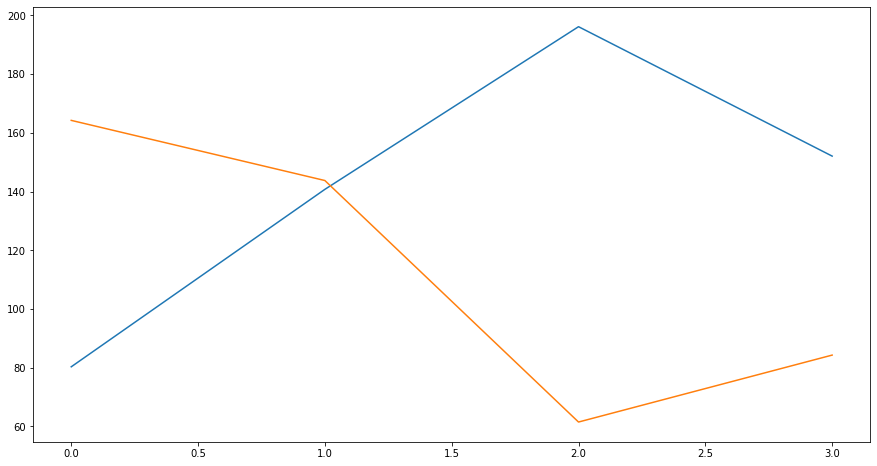

In [46]:
#Setting default Plot Size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,8

# fig, ax = plt.subplots()
plt.plot((yhat[0]*std_dev)+mean)
plt.plot((y_test*std_dev)+mean)
plt.show()

In [47]:
x_ann = []

for inp_val in X:
  x_input_ann = inp_val.reshape((1, n_steps_in, n_features))
  y_newpred = model.predict(x_input_ann, verbose = 1)
  x_ann.append(y_newpred)


1/1 [==============================] - 0s 3ms/step


In [48]:
x_ann = array(x_ann)
x_ann_new = x_ann[:, 0, :]
x_ann_new.shape
x_ann_new = x_ann_new.reshape(x_ann_new.shape[0], x_ann_new.shape[1], -1)
y_new = y.reshape(y.shape[0], y.shape[1], -1)

In [49]:
from numpy import array
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
import matplotlib.pyplot as plt
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Bidirectional
from keras.layers import GRU


In [50]:
model_auto = Sequential()
model_auto.add(Bidirectional(GRU(100, activation='relu', input_shape=(x_ann_new.shape[1], x_ann_new.shape[2]),return_sequences=True)))
model_auto.add(Bidirectional(GRU(50, activation='relu', return_sequences=True)))
model_auto.add(Bidirectional(GRU(10, activation='relu')))
model_auto.add(RepeatVector(x_ann_new.shape[1]))
model_auto.add(Bidirectional(GRU(100, activation='relu', return_sequences=True)))
model_auto.add(Bidirectional(GRU(50, activation='relu', return_sequences=True)))
model_auto.add(Bidirectional(GRU(10, activation='relu', return_sequences=True)))
model_auto.add(TimeDistributed(Dense(1)))
model_auto.compile(optimizer='adam', loss='mse')


In [51]:
monitor = EarlyStopping(monitor='loss', min_delta=1e-3, patience=50, verbose=1, mode='auto',
        restore_best_weights=True)
model_auto.fit(x_ann_new, y_new, callbacks=[monitor], validation_split = 0.1, verbose=1, epochs=2000)
#model_auto.save("autoEncoderModel.h5")


Train on 1292 samples, validate on 144 samples
Epoch 1/2000
1292/1292 [==============================] - 7s 5ms/step - loss: 0.0197 - val_loss: 0.0261
Epoch 2/2000
1292/1292 [==============================] - 2s 1ms/step - loss: 0.0095 - val_loss: 0.0189
Epoch 3/2000
1292/1292 [==============================] - 2s 1ms/step - loss: 0.0078 - val_loss: 0.0185
Epoch 4/2000
1292/1292 [==============================] - 2s 1ms/step - loss: 0.0074 - val_loss: 0.0160
Epoch 5/2000
1292/1292 [==============================] - 2s 1ms/step - loss: 0.0048 - val_loss: 0.0104
Epoch 6/2000
1292/1292 [==============================] - 2s 1ms/step - loss: 0.0040 - val_loss: 0.0103
Epoch 7/2000
1292/1292 [==============================] - 2s 1ms/step - loss: 0.0038 - val_loss: 0.0097
Epoch 8/2000
1292/1292 [==============================] - 2s 1ms/step - loss: 0.0037 - val_loss: 0.0093
Epoch 9/2000
1292/1292 [==============================] - 2s 1ms/step - loss: 0.0037 - val_loss: 0.0092
Epoch 10/2000
129

In [52]:
y_test.shape
y_test_new = y_test.reshape(y_test.shape[0], -1)


In [53]:
y_test_new.shape
y_test_new = y_test_new.T
y_test_new = y_test_new.reshape(y_test_new.shape[0], y_test_new.shape[1], -1)
print(y_test_new.shape)


(1, 4, 1)


In [54]:
x_ann_new_input = array(y_test_new)
yhat_new = model_auto.predict(x_ann_new_input, verbose=1)


1/1 [==============================] - 0s 467ms/step


In [55]:
print(yhat_new.shape)
print(y_test_new.shape)


(1, 4, 1)
(1, 4, 1)


In [56]:
y_test_new_actual = (y_test_new[0]*std_dev)+mean
yhat_predicted = (yhat_new[0]*std_dev)+mean


[[161.23296 ]
 [128.23233 ]
 [ 62.124863]
 [ 63.429966]]
[[164.26572099]
 [143.77988776]
 [ 61.52      ]
 [ 84.32119403]]


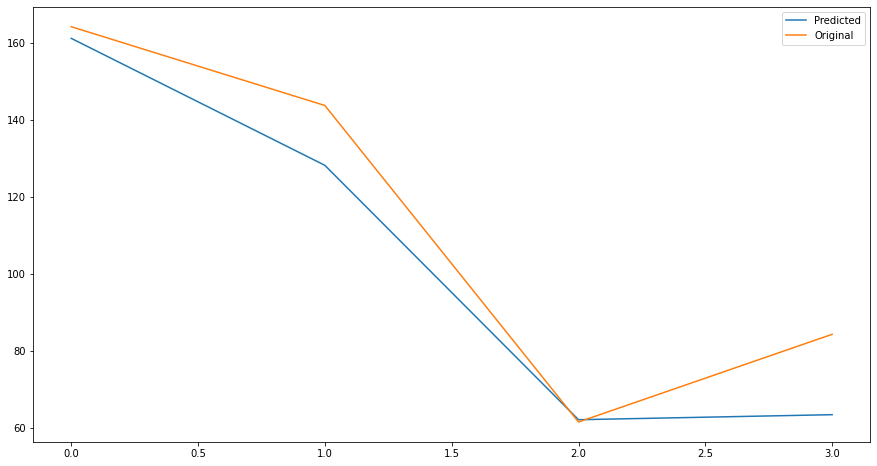

In [57]:
print(yhat_predicted)
print(y_test_new_actual)
plt.plot((yhat_predicted),label = 'Predicted')
plt.plot((y_test_new_actual), label = 'Original')
plt.legend()
plt.show()

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


rms_new = sqrt(mean_squared_error(y_test_new_actual, yhat_predicted))
print(rms_new)

mse_new = mean_squared_error(y_test_new_actual, yhat_predicted)
print(mse_new)

mae_new = mean_absolute_error(y_test_new_actual, yhat_predicted)
print(mae_new)

mape_new = mean_absolute_percentage_error(y_test_new_actual, yhat_predicted)
print(mape_new)


13.112336507597979
171.93336868848675
10.019103306332278
9.6046674400372
